#Overview of What You'll Learn:

In this tutorial, we will cover the basics of deep learning and neural networks, with a primary focus on feed-forward neural networks. You will learn how to build, train, and evaluate a feed-forward neural network using Pytorch. Additionally, we will explore GPU acceleration to speed up the training process.

#Installing Pytorch

In [ ]:
#You can install Pytorch with pip.
!pip install torch
!pip install torchvision



#Importing Necessary Libraries and Checking Pytorch Version

In [ ]:
import torch
import torchvision

# Check PyTorch version
print("PyTorch version:", torch.__version__)

# Tensors and their operations
Basic data structure in Pytorch is tensors (similar to NumPy arrays)

In [ ]:
# Converting Python list into PyTorch tensor
l = [[1, 2], [3, 4]]
print(type(l))
x = torch.tensor(l, dtype=torch.float32)
print(x)

In [ ]:
# Converting NumPy array into PyTorch tensor
import numpy as np
n_l = np.array([[1, 2], [3, 4]], dtype=np.float32)
print(type(n_l))
x = torch.tensor(n_l)
print(x)

In [ ]:
# Random initialization
x = torch.rand((2, 2))
print(type(x))
print(x)

In [ ]:
# Properties of tensors
x = torch.rand((2, 4, 3))
print(x)
print("Shape of x:", x.shape)

In [ ]:
# Reshaping
x_flat = x.view(24)
print("x_flat:", x_flat)
print()

x_reshaped = x.view(8, 3)
print("x_reshaped:", x_reshaped)
print()

x_reshaped = x.view(2, 12)
print("x_reshaped:", x_reshaped)
print()

x_reshaped = x.view(6, 4)
print("x_reshaped:", x_reshaped)
print()

In [ ]:
# Slicing
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#It follows (no of rows * no of columns)
print("x:", x)
print()
print("x[0]:", x[0])
print()
print("x[0,:]:", x[0, :])
print()
print("x[:,0]:", x[:, 0])
print()
print("x[:2, :]:", x[:2, :])
print()
print("x[1:, :]:", x[1:, :])
print()
print("x[:, 1:2]:", x[:, 1:2])

In [ ]:
# Derivatives
#We compute gradients using the backward() method, which is similar to TensorFlow's tf.GradientTape.
#The gradient of y with respect to x is stored in x.grad.
#The concept and workflow are quite similar to TensorFlow's automatic differentiation.
x = torch.tensor(3.0, requires_grad=True)
print("x:", x)

y = x**2

# Compute gradients
y.backward()
grad = x.grad
print()
print("grad:", grad)


Sigmoid Activation function

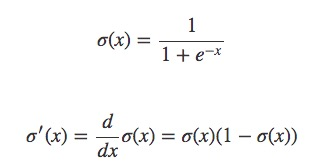

In [ ]:
# Sigmoid
x = torch.tensor(0.0, requires_grad=True)
print("x:", x)

y = torch.sigmoid(x)

# Compute gradients
y.backward()
grad = x.grad
print()
print("y:", y)
print()
print("grad:", grad)

In [ ]:
# tanh
x = torch.tensor(0.0, requires_grad=True)
print("x:", x)

y = torch.tanh(x)

# Compute gradients
y.backward()
grad = x.grad
print()
print("y:", y)
print()
print("grad:", grad)

#Loading a Dataset (e.g., MNIST) and preprocessing using Pytorch

##### Operations of tensors

In [ ]:
# Pytorch also provides convenient functions to load popular datasets.
# In this tutorial, we'll use the MNIST dataset, a collection of handwritten digits. You can load it as follows:
# Define data transformations (including normalization)
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Load the MNIST dataset with normalization
train_dataset = MNIST(root='./data', train=True, transform=ToTensor(), download=True)
test_dataset = MNIST(root='./data', train=False, transform=ToTensor(), download=True)



In [ ]:
import matplotlib.pyplot as plt
i = 0
image, label = train_dataset[i]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [ ]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [ ]:
#Let's visualize a batch of data in a grid using the `make_grid` function from `torchvision`.
#We'll also use the `.permute` method on the tensor to move the channels to the last dimension, as expected by `matplotlib`.
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

#Demonstrating Training

In [ ]:
def accuracy(outputs, labels):
    true_labels = labels.argmax(axis=1)
    predicted_labels = outputs.argmax(axis=1)
    return torch.tensor(torch.sum(predicted_labels == true_labels).item() / len(predicted_labels))

In [ ]:
import torch.nn as nn
criterion = nn.CrossEntropyLoss()

class MnistModel(nn.Module):
    """Feedfoward neural network with 2 hidden layer"""
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Flatten the image tensors
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

    def training_step(self, batch):
        images, labels = batch
        outputs = self(images) # Generate predictions
        loss = criterion(outputs, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        labels = torch.nn.functional.one_hot(labels, num_classes=10).float()
        outputs = self(images)                    # Generate predictions
        loss = criterion(outputs, labels)   # Calculate loss
        acc = accuracy(outputs, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

#Functions for moving your data and model on device

In [ ]:
# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("GPU is not available. Training on CPU.")


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

#Dataloader

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
# Model (on GPU)
model = MnistModel()
to_device(model, device)

In [ ]:
history = [evaluate(model, test_loader)]
history

In [ ]:
history += fit(10, 0.5, model, train_loader, test_loader)

#Evaluating the Model on Test Data

In [ ]:
#Once your model is trained, you need to evaluate its performance on a separate test dataset to assess its accuracy and other relevant metrics.
#You can use the following code for evaluation

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total



In [ ]:
print(accuracy)